In [1]:
# import the necessary packages
import os
import cv2
import csv
import glob
import time
import imutils
import numpy as np
from PIL import Image
from os import listdir
from os.path import exists
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import kurtosis, entropy
from skimage.feature import greycomatrix, greycoprops
import Descriptor as dp
import Searcher as sr

In [2]:
(PATH_PROJECT,PATH_DRAFT) = os.path.split(os.getcwd())
DRAFT = os.path.join(PATH_PROJECT,PATH_DRAFT)
#PATH_DATA = os.path.join(PATH_PROJECT,PATH_DRAFT)
DATASET = os.path.join(DRAFT,'dataset')
DATATMP = os.path.join(DRAFT,'data_tmp')
DATASET
listdir(DRAFT)
DATASET

'C:\\Users\\abdelkrim.saouabe\\Desktop\\Modis\\Projets\\Data Lake\\Phase_2\\Dev\\Similarity\\dataset'

In [5]:
# Test avec deuc descripteur 
def main():
    
    #path image tast + path data_index
    #path_img = DATASET+'\person_0000.jpg'
    #path_img = DATASET+'\cat_0034.jpg'
    #path_img = DATASET+'\dog_0007.jpg'
    #path_img = DATASET+'\car_0044.jpg'
    path_img = DATASET+'\\fruit_0015.jpg'

    
    #path_dataset = "dataset_index_511.csv"
    path_dataset = "dataset_index_65.csv"

    # instantiation des objets 
    descriptor = dp.Descriptor()
    searcher = sr.Searcher(path_dataset)
    
    image = cv2.cvtColor(cv2.imread(path_img), cv2.COLOR_BGR2RGB)
    # extraxtion de la signature de l'image test
    features = descriptor.image_query_describe(image)
    #reduce_features = descriptor.reduce_dim(features)


    # Recherche des similaire de l'image test dans la base data_index
    start = time.time()
    results = searcher.search(features)
    end = time.time()
    
    print("[INFO] Search method took {:.2f} seconds".format(end - start))

    #Affichage
    query_color = cv2.cvtColor(cv2.imread(path_img), cv2.COLOR_BGR2RGB)
    Images = []
    for (score, resultID) in results:
        #print(resultID)
        # load the result image and display it
        #print(score)
        result = cv2.cvtColor(cv2.imread(resultID), cv2.COLOR_BGR2RGB)
        Images.append(result)
    print(len(Images))
    print('Query :')
    plt.imshow(query_color)
    rows=5
    plt.figure(figsize=(25,25))
    print('Résults :')
    for num, x in enumerate(Images):
        plt.subplot(rows,5,num+1)
        #plt.title(x.split('.')[0])
        plt.axis('off')
        plt.imshow(x)

[INFO] Search method took 0.09 seconds
10
Query :
Résults :
[INFO] Applying took 0.44 seconds


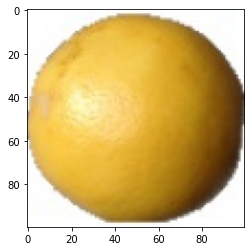

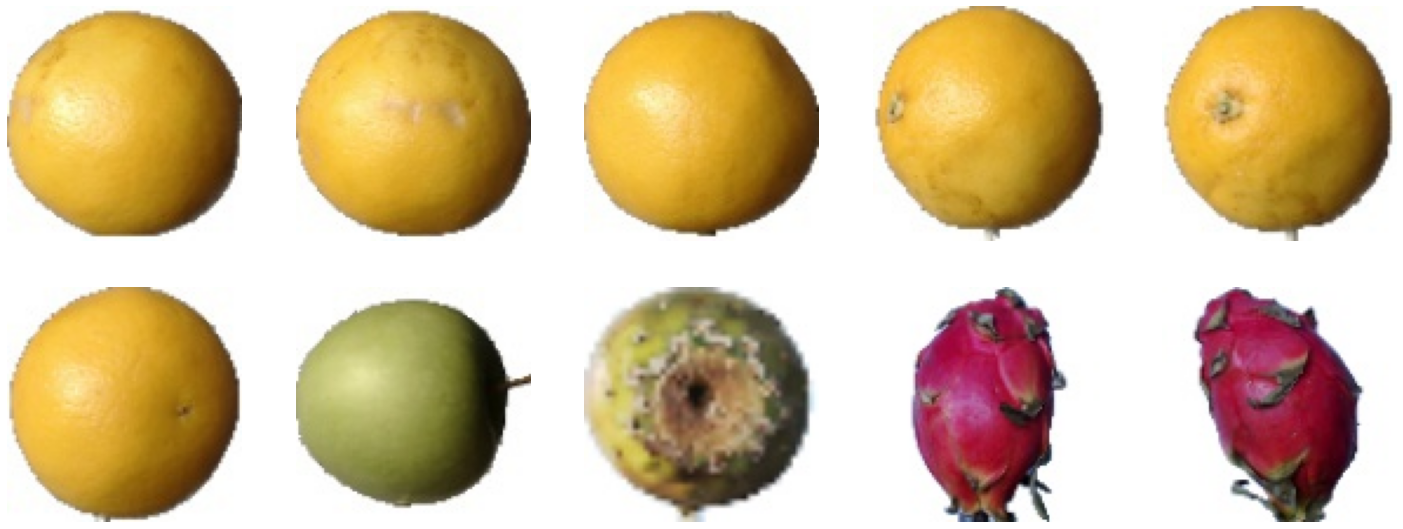

In [6]:
start = time.time()
main()
end = time.time()
print("[INFO] Applying took {:.2f} seconds".format(end - start))